<a href="https://colab.research.google.com/github/fernandarrios/shePY/blob/main/Aula8_shepy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Aula de Machine Learning: 
### Classificação de dados com a competição do Titanic (Kaggle)
![](https://i2.wp.com/www.devon-cornwall-film.co.uk/wp-content/uploads/2012/04/titanic.jpg?fit=460%2C246&ssl=1)

Neste desafio do [Kaggle](https://www.kaggle.com/c/titanic/overview), o objetivo é criar um modelo utilizando Machine Learning para predizer se um passageiro do Titanic sobreviveu ou não ao naufrágio.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('https://raw.githubusercontent.com/mariacmartins/shepy/main/titanic_dataset.csv')
train.head()

PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1         0       3  ...   7.2500   NaN         S
1            2         1       1  ...  71.2833   C85         C
2            3         1       3  ...   7.9250   NaN         S
3            4         1       1  ...  53.1000  C123         S
4            5         0       3  ...   8.0500   NaN         S

[5 rows x 12 columns]

In [3]:
train.shape #821 linhas (passageiros) e 12 colunas (features)

(891, 12)

In [4]:
train.describe()

PassengerId    Survived      Pclass  ...       SibSp       Parch        Fare
count   891.000000  891.000000  891.000000  ...  891.000000  891.000000  891.000000
mean    446.000000    0.383838    2.308642  ...    0.523008    0.381594   32.204208
std     257.353842    0.486592    0.836071  ...    1.102743    0.806057   49.693429
min       1.000000    0.000000    1.000000  ...    0.000000    0.000000    0.000000
25%     223.500000    0.000000    2.000000  ...    0.000000    0.000000    7.910400
50%     446.000000    0.000000    3.000000  ...    0.000000    0.000000   14.454200
75%     668.500000    1.000000    3.000000  ...    1.000000    0.000000   31.000000
max     891.000000    1.000000    3.000000  ...    8.000000    6.000000  512.329200

[8 rows x 7 columns]

**Remover as features irrelevantes**

Algumas features presentes no dataset não são úteis para nos ajudar a predizer se um passageiro sobreviveu ou não ao naufrágio.

In [5]:
train = train.drop(['PassengerId', 'Name','Ticket', 'Cabin'], axis = 1)

In [6]:
train.head()

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S

###Análise exploratória de dados

**Survived (sobreviência)**

In [7]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Os passageiros com o target igual a 0 são aqueles que não sobreviveram ao naufrágio, enquanto que os que sobreviveram estão com o valor 1 no target.

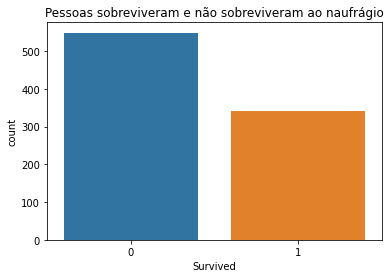

In [8]:
sns.countplot(x='Survived', data=train, order=train['Survived'].value_counts().index).set_title('Pessoas sobreviveram e não sobreviveram ao naufrágio');

**Pclass(classe do ticket do passageiro)**

1 - Classe alta

2 - Classe Média

3- Classe baixa

In [9]:
train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

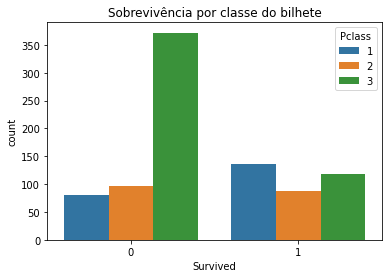

In [10]:
sns.countplot(x='Survived', hue='Pclass', data=train, order=train['Survived'].value_counts().index).set_title('Sobrevivência por classe do bilhete');

**Sex ( Gênero do passageiro)**

In [11]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

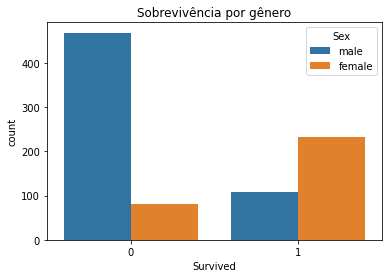

In [12]:
sns.countplot(x='Survived', hue='Sex', data=train, order=train['Survived'].value_counts().index).set_title('Sobrevivência por gênero');

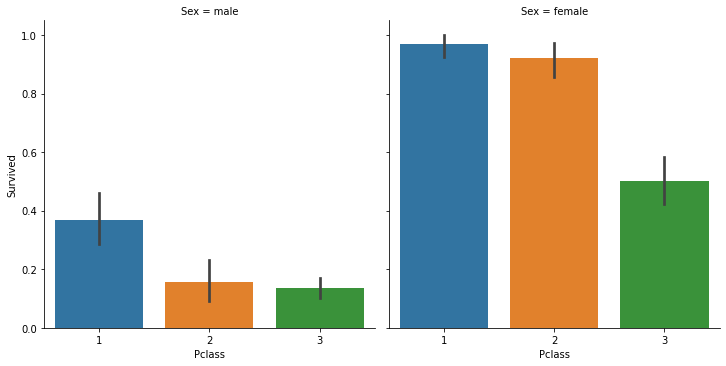

In [13]:
sns.catplot(x='Pclass', y='Survived', col='Sex', data=train, kind='bar');

**Age (idade do passageiro)**

In [14]:
train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


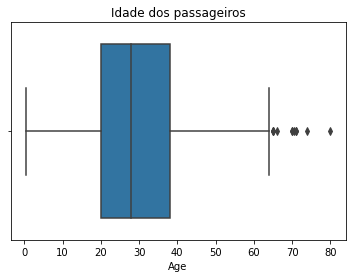

In [15]:
sns.boxplot(train['Age']).set_title('Idade dos passageiros');

###Feature Engineering

**Valores Faltantes**

In [16]:
train['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [17]:
median_age = train['Age'].median()
median_age

28.0

In [18]:
train.loc[train['Age'].isnull(), 'Age'] = median_age

In [19]:
train['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

A feature que indica o gênero dos passageiros é categórica. Iremos transformá-la em uma feature numérica.

In [20]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
train['Sex']= encoder.fit_transform(train['Sex'])

In [21]:
train.head()

Survived  Pclass  Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    1  22.0      1      0   7.2500        S
1         1       1    0  38.0      1      0  71.2833        C
2         1       3    0  26.0      0      0   7.9250        S
3         1       1    0  35.0      1      0  53.1000        S
4         0       3    1  35.0      0      0   8.0500        S

Homem: 1
 
Mulheres: 0

###Machine Learning

In [22]:
X = train[['Age', 'Sex', 'Pclass', 'Fare']]

#Nosso target
y= train['Survived']

In [23]:
X.head()

Age  Sex  Pclass     Fare
0  22.0    1       3   7.2500
1  38.0    0       1  71.2833
2  26.0    0       3   7.9250
3  35.0    0       1  53.1000
4  35.0    1       3   8.0500

In [24]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

Precisamos agora separar nosso conjunto de dados entre **treino** e **teste**

In [25]:
from sklearn.model_selection import train_test_split

#Separar entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Árvore de decisão:**

[Documentação](https://scikit-learn.org/stable/modules/tree.html)

In [26]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy')

#Treinar o modelo
model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

UHULLLLL! Temos nosso primeiro modelo de classificação \o/

In [27]:
from sklearn.tree import export_graphviz
export_graphviz (model, out_file='titanic_tree.dot', feature_names=['Age','Sex', 'Pclass', 'Fare'], rounded = True, filled=True, class_names=['Não sobreviveu', 'Sobreviveu'])
!dot -Tpng titanic_tree.dot -o titanic_tree.png

Após converter o arquivo de texto, podemos visualizar a árvore abaixo. As cores ajudam a identificar a classificação dada pelo modelo:

Nós ou folhas em azul significam que a nossa árvore de decisão acredita que o passageiro SOBREVIVEU.

Já nos nós e folhas em laranja, a árvore acha que o passageiro NÃO SOBREVIVEU.

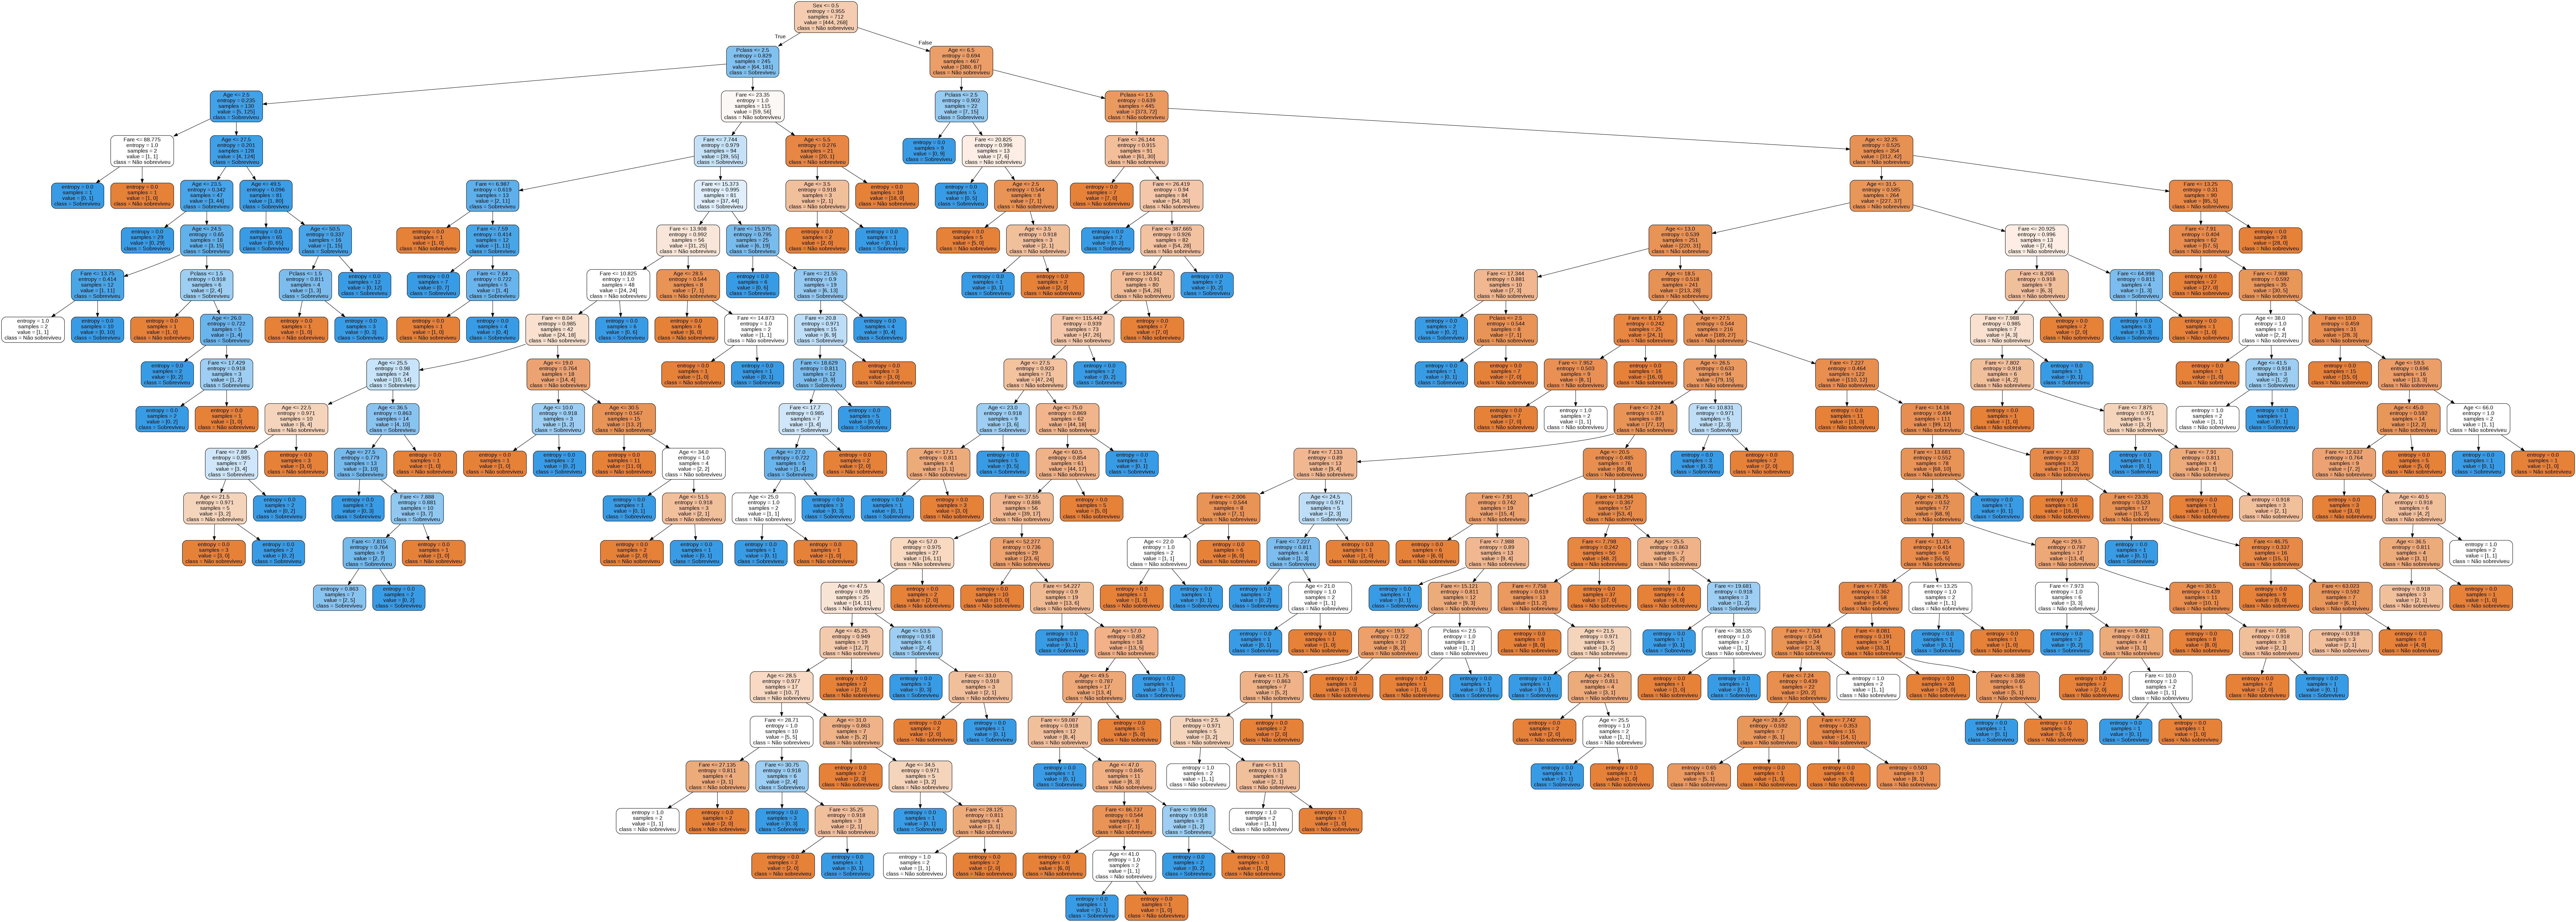

In [28]:
from IPython.core.display import Image, display
display(Image('titanic_tree.png', width=3500, unconfined=True))

**Avaliar o nosso modelo**

In [31]:
y_pred = model.predict(X_test)

In [32]:
y_pred

array([0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1])

In [33]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7653631284916201

In [34]:
from sklearn.metrics import confusion_matrix
import itertools

In [35]:
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

array([[83, 22],
       [20, 54]])

In [36]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Matriz de confusão',
                          cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    #plt.ylim(0.5, 0.5)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.ylim(1.5, -0.5) 

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Classe real')
    plt.xlabel('Classe prevista')
    plt.tight_layout()

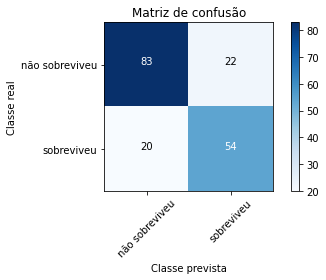

In [37]:
plot_confusion_matrix(cnf_matrix, classes=['não sobreviveu', 'sobreviveu'])

**RandomForestClassifier:**

[Documentação](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

In [38]:
from sklearn.ensemble import RandomForestClassifier
modelrf = RandomForestClassifier(criterion='entropy')
modelrf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [40]:
y_pred = modelrf.predict(X_test)

In [41]:
accuracy_score(y_test, y_pred)

0.7932960893854749

**Gradient Boosting Classifier:**

[Documentação](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)

In [42]:
from sklearn.ensemble import GradientBoostingClassifier

modelgb= GradientBoostingClassifier()
modelgb.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [44]:
y_pred = modelgb.predict(X_test)

In [45]:
accuracy_score(y_test, y_pred)

0.8100558659217877

### MLPClassifier:
Documentação: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

In [46]:
from sklearn.neural_network import MLPClassifier

modelnn = MLPClassifier(max_iter=400)
modelnn.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=400,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [47]:
y_pred = modelnn.predict(X_test)

In [48]:
accuracy_score(y_test, y_pred)

0.7877094972067039